In [1]:
import sys
sys.path.append('../../')

In [2]:
import pickle
import numpy as np
import pandas as pd
from utils.dataset import DataSet, LABELS
from collections import Counter
from matplotlib import pyplot as plt
from env import *

%matplotlib inline

In [3]:
WORD_SEQS_PATH = os.path.join(CACHES_PATH, 'word_seqs', 'simple')

TRAIN_WORDS_PKL = os.path.join(WORD_SEQS_PATH, 'train_words.pkl')
VAL_WORDS_PKL = os.path.join(WORD_SEQS_PATH, 'val_words.pkl')
TEST_WORDS_PKL = os.path.join(WORD_SEQS_PATH, 'test_words.pkl')

WORD_INDEX_PKL = os.path.join(WORD_SEQS_PATH, 'word_index.pkl')

TRAIN_SEQS_PKL = os.path.join(WORD_SEQS_PATH, 'train_seqs.pkl')
VAL_SEQS_PKL = os.path.join(WORD_SEQS_PATH, 'val_seqs.pkl')
TEST_SEQS_PKL = os.path.join(WORD_SEQS_PATH, 'test_seqs.pkl')

TRAIN_SEQS_PADDED_PKL = os.path.join(WORD_SEQS_PATH, 'train_seqs_padded.pkl')
VAL_SEQS_PADDED_PKL = os.path.join(WORD_SEQS_PATH, 'val_seqs_padded.pkl')
TEST_SEQS_PADDED_PKL = os.path.join(WORD_SEQS_PATH, 'test_seqs_padded.pkl')

EMBEDDING_PKL = os.path.join(WORD_SEQS_PATH, 'wem.pkl')


In [4]:
with open(WORD_INDEX_PKL, 'rb') as f:
    word_index = pickle.load(f)

with open(TRAIN_WORDS_PKL, 'rb') as f:
    train_words = pickle.load(f)
    
with open(VAL_WORDS_PKL, 'rb') as f:
    val_words = pickle.load(f)
    
with open(TEST_WORDS_PKL, 'rb') as f:
    test_words = pickle.load(f)

with open(TRAIN_SEQS_PKL, 'rb') as f:
    train_seqs = pickle.load(f)
    
with open(VAL_SEQS_PKL, 'rb') as f:
    val_seqs = pickle.load(f)
    
with open(TEST_SEQS_PKL, 'rb') as f:
    test_seqs = pickle.load(f)
    
with open(EMBEDDING_PKL, 'rb') as f:
    embedding = pickle.load(f)
    
with open(TRAIN_SEQS_PADDED_PKL, 'rb') as f:
    train_seqs_padded = pickle.load(f)
    
with open(VAL_SEQS_PADDED_PKL, 'rb') as f:
    val_seqs_padded = pickle.load(f)
    
with open(TEST_SEQS_PADDED_PKL, 'rb') as f:
    test_seqs_padded = pickle.load(f)

(249.0, 125.55949523809524, 843)

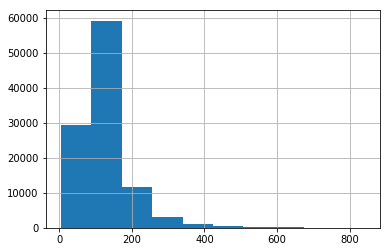

In [5]:
train_seqs_len = train_seqs.words_seq.apply(len)
train_seqs_len.hist()
train_seqs_len.quantile(0.95), train_seqs_len.mean(), train_seqs_len.max()

(200.0, 125.03173333333334)

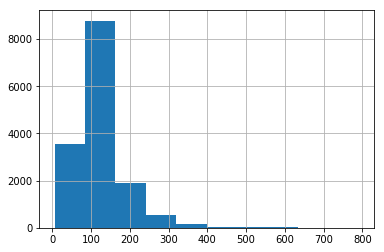

In [6]:
val_seqs_len = val_seqs.words_seq.apply(len)
val_seqs_len.hist()
val_seqs_len.quantile(0.9), val_seqs_len.mean()

(251.0, 125.87386666666667)

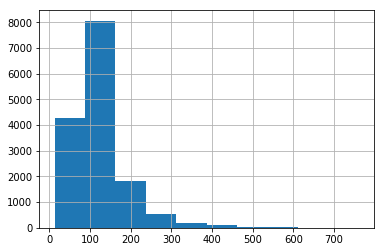

In [7]:
test_seqs_len = test_seqs.words_seq.apply(len)
test_seqs_len.hist()
test_seqs_len.quantile(0.95), test_seqs_len.mean()

In [8]:
all_words = []
all_words_ser = train_words.words.append(val_words.words).append(test_words.words)
for sen in all_words_ser:
    all_words.extend(sen)

In [9]:
words_counter = Counter(all_words)

In [10]:
ser = pd.Series(words_counter)
ser

0                            234
00                            48
000                            1
0000                           3
0000000                        1
00002400                       1
0003                           1
001                           39
001rmb                         1
002                            1
0020                           1
0025                           1
003                            7
0048                           7
005                            1
005B                           1
006                            1
0066211514012                  1
007                           26
00778899WIFI                   1
008                            3
009                            2
009C1C2                        1
01                            38
010                            3
0101                           5
010111NewBridgeRoad059383      1
0105                           1
0106                           1
01062440090                    1
          

In [11]:
ser.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,0.8, 0.9])

0.1     1.0
0.2     1.0
0.3     1.0
0.4     1.0
0.5     1.0
0.6     2.0
0.7     3.0
0.8     6.0
0.9    21.0
dtype: float64

In [12]:
(ser > 80).sum()

12806

In [13]:
ser[ser==90]

115     90
399     90
54      90
一抹      90
一放      90
一烤      90
不菲      90
不解      90
乳白色     90
伤       90
作响      90
八人      90
公认      90
公路      90
冒出来     90
刷刷      90
加醋      90
卷上      90
在场      90
多样化     90
大煮      90
大胆      90
奥体      90
奶白      90
客户端     90
寻思      90
小天鹅     90
屋子里     90
希尔顿     90
带骨      90
        ..
生菜沙拉    90
留住      90
目光      90
眼肉      90
研制      90
第一张     90
粉店      90
绿色蔬菜    90
绿茵阁     90
缘       90
网给      90
肉厚      90
苦荞      90
茶馆      90
装扮      90
要排      90
解说      90
赞赏      90
超乎      90
身份      90
选鱼      90
遮盖      90
那句      90
金城      90
鞋       90
饽饽      90
香醋      90
马兰头     90
鱼肠      90
黄沙      90
Length: 83, dtype: int64

In [14]:
words_counter.most_common(50000)

[('很', 377942),
 ('吃', 310486),
 ('都', 228964),
 ('还', 161769),
 ('味道', 158471),
 ('不错', 156052),
 ('好', 154910),
 ('不', 154339),
 ('感觉', 118520),
 ('好吃', 108722),
 ('去', 104958),
 ('没有', 96953),
 ('说', 95519),
 ('比较', 94675),
 ('点', 93410),
 ('人', 92834),
 ('菜', 74712),
 ('上', 73482),
 ('喜欢', 70547),
 ('服务员', 69655),
 ('店', 64856),
 ('有点', 62394),
 ('环境', 61978),
 ('这家', 60616),
 ('非常', 60455),
 ('里面', 60072),
 ('没', 57761),
 ('服务', 57586),
 ('挺', 56722),
 ('不是', 53795),
 ('特别', 52440),
 ('觉得', 50809),
 ('口味', 48049),
 ('会', 47366),
 ('推荐', 46636),
 ('真的', 46399),
 ('很多', 46194),
 ('元', 42628),
 ('大', 42174),
 ('菜品', 40447),
 ('再', 38716),
 ('肉', 37917),
 ('小', 37878),
 ('做', 37011),
 ('新鲜', 36920),
 ('价格', 36253),
 ('最', 35834),
 ('口感', 35503),
 ('牛肉', 35480),
 ('朋友', 34924),
 ('点评', 34451),
 ('一份', 32866),
 ('里', 31348),
 ('位置', 31272),
 ('最后', 30524),
 ('太', 30010),
 ('团购', 30000),
 ('看', 29919),
 ('他家', 29099),
 ('想', 29012),
 ('才', 28437),
 ('知道', 28336),
 ('两个', 28295),
 ('一点', 

In [15]:
train_seqs_padded.words_seq[1]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,